# Definition

Polynomial regression is a special case of Linear regression. Our goal is to establish a polynomial relation between our independant variable(s) $X = (x_1, x_2, ..., x_n)$ and our dependant variable $Y$.

The polynomial relation that exists between these variables will be of the following form  :
\begin{equation}
Y = b + a_1 X^1 + a_2 X^2 + ... + a_n X^n
\end{equation}
To fit a polynomial regression model we have to find the values of the coeficients $(b, a1, ... , an)$

# Expirements
The dataset that will be used is composed of measures of temperature and pressure where pressure is the dependant variable.

In [1]:
# Importing the packages needed
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data.csv')
data

,ID,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [3]:
#Seperating the dependant and independant variables
x = data.iloc[:, 1:2].values
y = data.iloc[:, 2].values

## Linear Regression
Let's try to fit our data using linear regression

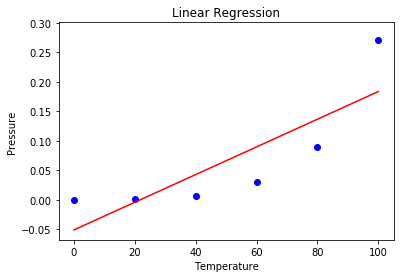

In [4]:
from sklearn.linear_model import LinearRegression

# Normal Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(x, y)

# Plotting the results of the Linear Regression
plt.scatter(x, y, color = 'blue')
plt.plot(x, lin_reg.predict(x), color = 'red')
plt.title('Linear Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.show()

## Observation
We can clearly see that the linear regression model can't clearly fit the data that we have

## Polynomial Regression
Let's try now to fit our data using Polynomial Regression.
To do so, we build a pipeline that transforms our features to higher order then applies Linear Regression to these transformed features (in our case we have only one feature).

Our piepline will be composed of :
<ol>
  <li><b>Feature transformation step : </b>In this step we use the PolyNomialFeatures class, this class takes the degree of the polynomial transformation then uses the fit_transform() method to generate the higher order features.</li>
    <li><b>Linear Regression step : </b> in this step we run normal linear regression but instead of using the intial features we use the higher order features returned from the first step.</li>
</ol>

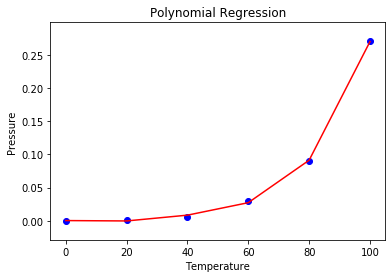

In [5]:
from sklearn.preprocessing import PolynomialFeatures

# Step 1 : transforming the features to a higher order : 4th degree here
poly = PolynomialFeatures(degree = 4)
x_poly = poly.fit_transform(x)  

# Step 2 : applying normal Linear Regression to the higher order features
poly.fit(x_poly, y)
poly_reg = LinearRegression()
poly_reg.fit(x_poly, y)

# Plotting the results of the Polynomial Regression
plt.scatter(x, y, color = 'blue')  
plt.plot(x, poly_reg.predict(x_poly), color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')  
plt.show()